# Module 11 Challenge

In [66]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os

In [67]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [68]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [69]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')
pprint.pprint(soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [70]:
# Extract all rows of data
# Find the table
table = soup.find('table')

# Find all rows in the table
rows = table.find_all('tr')

# Initialize an empty list
data = []

# Iterate over each row, extracting the data
for row in rows:
    # Find all cells in the row
    cells = row.find_all('td')
    if cells:
        # Extract the data from each cell
        row_data = [cell.get_text() for cell in cells]
        data.append(row_data)

for row_data in data:
    print(row_data)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [71]:
# Create an empty list
list_mars_data = []

# Loop through the scraped data to create a list of rows
for row_data in data:
    list_mars_data.append(row_data)

# Verify the list of rows has been created
list_mars_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [72]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_mars_data = pd.DataFrame(data = list_mars_data, columns = ['id','terrestrial_date','sol','ls','month','min_temp','pressure'])

In [73]:
# Confirm DataFrame was created successfully
print(f'The dataframe has {len(df_mars_data)} rows of data')
df_mars_data

The dataframe has 1867 rows of data


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [74]:
# Examine data type of each column
df_mars_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [75]:
# Change data types for data analysis
# Convert 'terrestrial_date' column to datetime data type
df_mars_data['terrestrial_date'] = pd.to_datetime(df_mars_data['terrestrial_date'])

# Convert 'sol', 'ls', 'month' columns to int data type
df_mars_data['sol'] = df_mars_data['sol'].astype(int)
df_mars_data['ls'] = df_mars_data['ls'].astype(int)
df_mars_data['month'] = df_mars_data['month'].astype(int)

# Convert 'min_temp' and 'pressure' columns to float data type
df_mars_data['min_temp'] = df_mars_data['min_temp'].astype(float)
df_mars_data['pressure'] = df_mars_data['pressure'].astype(float)


In [76]:
# Confirm type changes were successful by examining data types again
print(df_mars_data.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [77]:
# 1. How many months are there on Mars?
# Extract the 'month' column
months = df_mars_data['month']

# Calculate the count of each month number
df_month_counts = months.value_counts().reset_index()

# Rename the columns
df_month_counts.columns = ['Month', 'Count']

# Sort the dataframe by month number
df_month_counts = df_month_counts.sort_values('Month')

# Reset the index
df_month_counts = df_month_counts.reset_index(drop=True)

# Print the result without the index column
print(df_month_counts.to_string(index=False))

 Month  Count
     1    174
     2    178
     3    192
     4    194
     5    149
     6    147
     7    142
     8    141
     9    134
    10    112
    11    138
    12    166


In [78]:
# 2. How many Martian days' worth of data are there?
# Calculate the number of unique sol values
num_martian_days = df_mars_data['sol'].nunique()

# Print the result
print(f"There are {num_martian_days} Martian days' worth of data.")

There are 1867 Martian days' worth of data.


In [79]:
# 3. What is the average low temperature by month? (Units are Celsius)
average_low_temp_by_month = df_mars_data.groupby('month')['min_temp'].mean()
average_low_temp_by_month = average_low_temp_by_month.round(2)
average_low_temp_by_month_str = average_low_temp_by_month.astype(str) + " \u00b0C"
average_low_temp_by_month_str


month
1     -77.16 °C
2     -79.93 °C
3     -83.31 °C
4     -82.75 °C
5     -79.31 °C
6      -75.3 °C
7     -72.28 °C
8     -68.38 °C
9     -69.17 °C
10    -71.98 °C
11    -71.99 °C
12    -74.45 °C
Name: min_temp, dtype: object

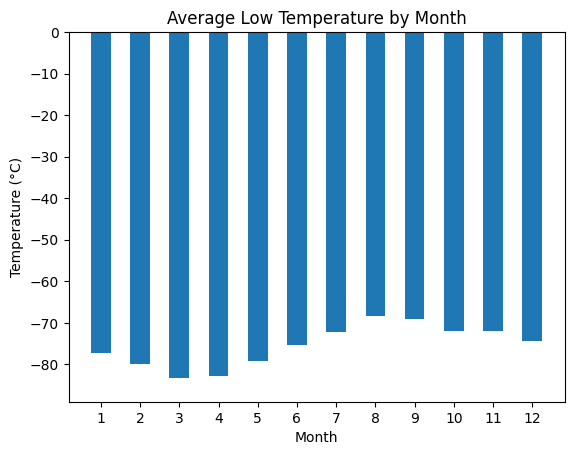

In [80]:
# Plot the average low temperature by month
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, align='center', width = 0.5)
plt.xlabel('Month')
plt.ylabel('Temperature (\u00b0C)')
plt.title('Average Low Temperature by Month')
plt.xticks(range(1, 13))  # Set the x-axis tick labels to months (1 to 12)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.ylim(-89, 0)  # Set the y-axis limits
plt.grid(False)
plt.show()

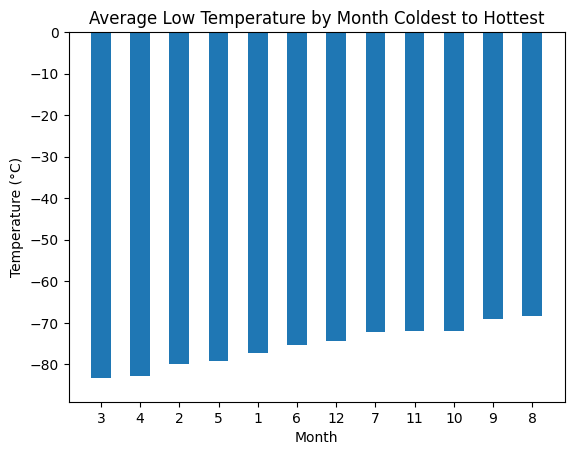

The coldest and hottest months in Curiosity's location are:
Coldest: -83.31
Hottest: -68.38


In [81]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the series by values in ascending order
sorted_temp_by_month = average_low_temp_by_month.sort_values()

sorted_temp_by_month

# Plot the sorted series
plt.bar(range(1, 13), sorted_temp_by_month.values, align='center', width = 0.5)
plt.xlabel('Month')
plt.ylabel('Temperature (\u00b0C)')
plt.title('Average Low Temperature by Month Coldest to Hottest')
plt.xticks(range(1, 13), sorted_temp_by_month.index)  # Set the x-axis tick labels to sorted months
plt.gca().invert_yaxis()  # Invert the y-axis
plt.ylim(-89, 0)
plt.grid(False)
plt.show()

print("The coldest and hottest months in Curiosity's location are:\n"\
    f"Coldest: {sorted_temp_by_month.iloc[0]}\n"\
    f"Hottest: {sorted_temp_by_month.iloc[-1]}")


In [82]:
# 4. Average pressure by Martian month
average_pressure_by_month = df_mars_data.groupby('month')['pressure'].mean()
average_pressure_by_month = average_pressure_by_month.round(2)
average_pressure_by_month_str = average_pressure_by_month.astype(str) + " Atmospheric Pressure"
average_pressure_by_month_str

month
1     862.49 Atmospheric Pressure
2     889.46 Atmospheric Pressure
3     877.32 Atmospheric Pressure
4     806.33 Atmospheric Pressure
5     748.56 Atmospheric Pressure
6     745.05 Atmospheric Pressure
7     795.11 Atmospheric Pressure
8     873.83 Atmospheric Pressure
9     913.31 Atmospheric Pressure
10    887.31 Atmospheric Pressure
11    857.01 Atmospheric Pressure
12    842.16 Atmospheric Pressure
Name: pressure, dtype: object

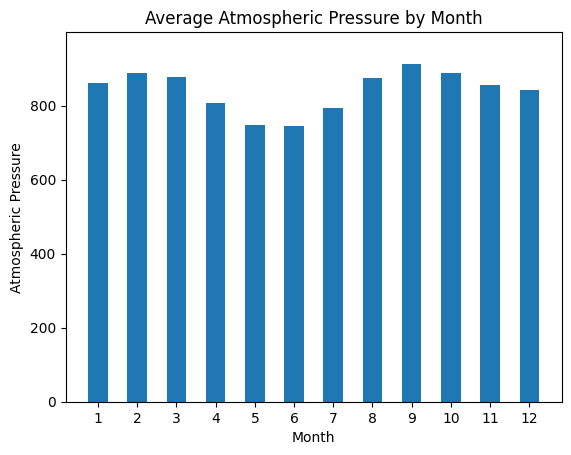

In [83]:
# Plot the average pressure by month
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, align='center', width = 0.5)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.xticks(range(1, 13))  # Set the x-axis tick labels to months (1 to 12)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.ylim(0, 999)  # Set the y-axis limits
plt.grid(False)
plt.show()

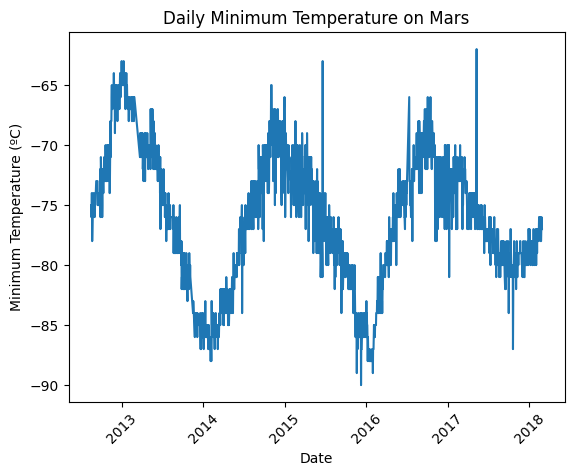

The estimated number of terrestrial days in a Martian year is approximately 660 days.


In [84]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Calculate the range of dates
start_date = df_mars_data['terrestrial_date'].min()
end_date = df_mars_data['terrestrial_date'].max()
observation_days = (end_date - start_date).days + 1

# Plot the daily minimum temperature against the dates
plt.plot(df_mars_data['terrestrial_date'], df_mars_data['min_temp'])
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (ºC)')
plt.title('Daily Minimum Temperature on Mars')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Estimate the Martian year visually and calculate the number of terrestrial days
martian_year_days =  660

# Print the result
print(f"The estimated number of terrestrial days in a Martian year is approximately {martian_year_days} days.")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [85]:
# Write the data to a CSV
# Get the current working directory
current_directory = os.getcwd()

# Navigate to the parent directory
parent_directory = os.path.dirname(current_directory)

# Specify the target directory (Output) and file name
target_directory = os.path.join(parent_directory, 'Output')
csv_file_path = os.path.join(target_directory, 'df_mars_data.csv')

# Write the data to the CSV file
df_mars_data.to_csv(csv_file_path, index=False)

In [86]:
browser.quit()